<a href="https://colab.research.google.com/github/sreeharsha1902/Hand_written_digits_recognition/blob/main/MICROP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MicroP project-------o
TensorFlow,Mnist dataset

In [ ]:
#importing essentials
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math

In [ ]:

  
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>0.998):
          print('\nReached 99.8% accuracy so cancelling training!')
          self.model.stop_training=True
   

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0
    
callbacks=mycallback()
    
model = tf.keras.models.Sequential([
          
            tf.keras.layers.Conv2D(512,(2,2),activation='relu',input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dense(128,activation='relu'),
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(10,activation='softmax')
          
])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   
history = model.fit(
      
        training_images,training_labels,epochs=7
      
)
    
model.evaluate(test_images,test_labels)
    





11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 512)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               22151424  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________

[0.05536483973264694, 0.9850000143051147]

In [ ]:
#test done ---- all 10000 images of test are used ---- no problem
(training_images, training_labels), (test, test_l) = mnist.load_data()
test=test/255.0
model.predict(test[9999].reshape(1,28,28,1))

array([[6.4332897e-12, 1.6978152e-12, 1.2517238e-15, 2.8685896e-17,
        3.3209416e-12, 1.8375435e-10, 1.0000000e+00, 1.4768923e-19,
        1.8201215e-12, 1.9647581e-15]], dtype=float32)

In [ ]:
#importing handwritten number from the drive
from google.colab import drive
drive.mount('/content/gdrive')
image_path = "/content/gdrive/My Drive/Colab Notebooks/9.jpeg"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


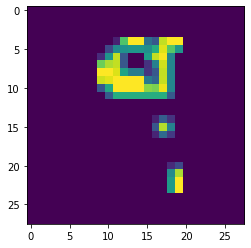

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.6576916e-24, 1.0000000e+00]], dtype=float32)

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(image_path, 0)
gray = cv2.resize(img, (28, 28))
(thresh, gray) = cv2.threshold(gray,130, 255, cv2.THRESH_BINARY_INV)
while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape

if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))

colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

plt.imshow(gray)
plt.show()

model.predict(gray.reshape(1,28,28,1))

In [ ]:
from tkinter import *
m=tkinter.Tk()


TclError: ignored